# 1.内容组成
- 数据读取
- 数据扩增
- Pytorch读取数据

# 2.数据读取
在Python中有很多库可以完成数据读取的操作，比较常见的有Pillow和OpenCV。
## 2.1pillow
Pillow是Python图像处理函式库(PIL）的一个分支。Pillow提供了常见的图像读取和处理的操作，而且可以与ipython notebook无缝集成，是应用比较广泛的库。

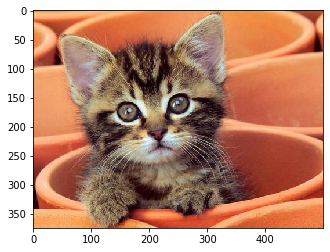

In [11]:
#原图
from PIL import Image# 导入Pillow库
import matplotlib.pyplot as plt
# 读取图片
im =Image.open('Pillow读取原图.png')
plt.figure("Image") # 图像窗口名称
plt.imshow(im)
plt.show()

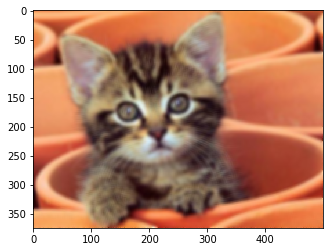

In [12]:
# 应用模糊滤镜
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
im = Image.open('Pillow模糊原图.png') 
im2 = im.filter(ImageFilter.BLUR)
plt.figure("Image") # 图像窗口名称
plt.imshow(im2)
plt.show()

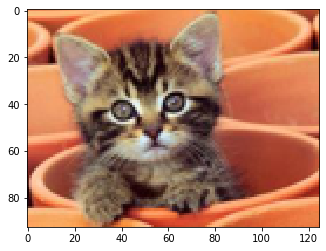

In [15]:
#缩放图
from PIL import Image# 打开一个jpg图像文件，注意是当前路径
import matplotlib.pyplot as plt
im = Image.open('Pillow缩放原图.png')
im.thumbnail((im.size[0]//2, im.size[1]//2))
plt.figure("Image") # 图像窗口名称
plt.imshow(im)
plt.show()

## 2.2OpenCV
OpenCV是一个跨平台的计算机视觉库，最早由Intel开源得来。OpenCV发展的非常早，拥有众多的计算机视觉、数字图像处理和机器视觉等功能。OpenCV在功能上比Pillow更加强大很多，学习成本也高很多。

# 3.数据扩增
在深度学习中数据扩增方法非常重要，数据扩增可以增加训练集的样本，同时也可以有效缓解模型过拟合的情况，也可以给模型带来的更强的泛化能力。
- 用处

在深度学习模型的训练过程中，数据扩增是必不可少的环节。现有深度学习的参数非常多，一般的模型可训练的参数量基本上都是万到百万级别，而训练集样本的数量很难有这么多，其次数据扩增可以扩展样本空间。

- 方法

数据扩增方法有很多：从颜色空间、尺度空间到样本空间，同时根据不同任务数据扩增都有相应的区别。
对于图像分类，数据扩增一般不会改变标签；对于物体检测，数据扩增会改变物体坐标位置；对于图像分割，数据扩增会改变像素标签。

- 常见数据扩增方法

在常见的数据扩增方法中，一般会从图像颜色、尺寸、形态、空间和像素等角度进行变换。当然不同的数据扩增方法可以自由进行组合，得到更加丰富的数据扩增方法。

以torchvision为例，常见的数据扩增方法包括：
- transforms.CenterCrop 对图片中心进行裁剪
- transforms.ColorJitter 对图像颜色的对比度、饱和度和零度进行变换
- transforms.FiveCrop 对图像四个角和中心进行裁剪得到五分图像
- transforms.Grayscale 对图像进行灰度变换
- transforms.Pad 使用固定值进行像素填充
- transforms.RandomAffine 随机仿射变换
- transforms.RandomCrop 随机区域裁剪
- transforms.RandomHorizontalFlip 随机水平翻转
- transforms.RandomRotation 随机旋转
- transforms.RandomVerticalFlip 随机垂直翻转



- 数据扩增库


torchvision
https://github.com/pytorch/vision
pytorch官方提供的数据扩增库，提供了基本的数据数据扩增方法，可以无缝与torch进行集成；但数据扩增方法种类较少，且速度中等；

imgaug
https://github.com/aleju/imgaug
imgaug是常用的第三方数据扩增库，提供了多样的数据扩增方法，且组合起来非常方便，速度较快；

albumentations
https://albumentations.readthedocs.io
是常用的第三方数据扩增库，提供了多样的数据扩增方法，对图像分类、语义分割、物体检测和关键点检测都支持，速度较快。

# 4.Pytorch读取数据


In [ ]:
import os, sys, glob, shutil, json
import cv2

from PIL import Image
import numpy as np

import torch
from torch.utils.data.dataset import Dataset
import torchvision.transforms as transforms

class SVHNDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label 
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)
        
        # 原始SVHN中类别10为数字0
        lbl = np.array(self.img_label[index], dtype=np.int)
        lbl = list(lbl)  + (5 - len(lbl)) * [10]
        
        return img, torch.from_numpy(np.array(lbl[:5]))

    def __len__(self):
        return len(self.img_path)

train_path = glob.glob('../input/train/*.png')
train_path.sort()
train_json = json.load(open('../input/train.json'))
train_label = [train_json[x]['label'] for x in train_json]

data = SVHNDataset(train_path, train_label,
          transforms.Compose([
              # 缩放到固定尺寸
              transforms.Resize((64, 128)),

              # 随机颜色变换
              transforms.ColorJitter(0.2, 0.2, 0.2),

              # 加入随机旋转
              transforms.RandomRotation(5),

              # 将图片转换为pytorch 的tesntor
              # transforms.ToTensor(),

              # 对图像像素进行归一化
              # transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
            ]))